# Tensorflow and Keras

In [1]:
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

## Agenda

SWBAT:

- use `keras` to code up a neural network model;
- explain dropout and early stopping as distinctive forms of regularization in neural networks;
- use wrappers inside `keras` to make models that can jibe with `sklearn`.

## Modeling

Before we dive in, let's remind ourselves that the basic components of good modeling practice, and even the methods themselves, are _the same_ with Neural Nets as they are with _sklearn_ or _statsmodels_.

In [2]:
# We can also import `keras` directly.

# import keras

Wait a second, what is that warning? 
`Using TensorFlow backend.`

<img align =left src="../img/keras.png"><br>
### Keras is an API

It can be layered on top of many different back-end processing systems.

![kerasback](../img/keras_tf_theano.png)

While each of these systems has its own coding methods, `keras` abstracts from that in the streamlined Pythonic manner we are used to seeing in other Python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

Theano has been discontinued.  The last release was 2017, but can still be used.

We will use TensorFlow, as it is the most popular. TensorFlow became the most used Keras backend, and  eventually integrated Keras in via its tf.keras submodule.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

## Building a Binary Classifier NN

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

We will start with a binary classification, and predict whether the number will be even or odd.

In [5]:
y_binary = y % 2
y_binary

array([0, 1, 0, ..., 0, 1, 0])

In [6]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, y_binary, epochs=50, batch_size=10)

Epoch 1/50
180/180 [==============================] - 1s 1ms/step - loss: 2.3532 - accuracy: 0.5391
Epoch 2/50
180/180 [==============================] - 0s 999us/step - loss: 0.4429 - accuracy: 0.7801
Epoch 3/50
180/180 [==============================] - 0s 991us/step - loss: 0.3397 - accuracy: 0.8462
Epoch 4/50
180/180 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.8960
Epoch 5/50
180/180 [==============================] - 0s 971us/step - loss: 0.1948 - accuracy: 0.9248
Epoch 6/50
180/180 [==============================] - 0s 797us/step - loss: 0.1798 - accuracy: 0.9209
Epoch 7/50
180/180 [==============================] - 0s 888us/step - loss: 0.1380 - accuracy: 0.9445
Epoch 8/50
180/180 [==============================] - 0s 864us/step - loss: 0.1515 - accuracy: 0.9328
Epoch 9/50
180/180 [==============================] - 0s 894us/step - loss: 0.1057 - accuracy: 0.9482
Epoch 10/50
180/180 [==============================] - 0s 822us/step - loss: 0.1017 - 

### Things to know:

- The data and labels in `fit()` need to be numpy arrays, not `pandas` dfs.
- Scaling your data will have a large impact on your model.
   > For our traditional input features, we would use a scaler object. For images, as long as the minimum value is 0, we can simply divide through by the maximum pixel intensity.

#### Getting data ready for modeling
**Preprocessing**:

- use train_test_split to create X_train, y_train, X_test, and y_test
- Split training data into pure_train and validation sets.
- Scale the pixel intensity to a value between 0 and 1.

Scaling our input variables will help speed up our neural network.

Since our minimum intensity is 0, we can normalize the inputs by dividing each value by the max value (16).

In [8]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y_binary, random_state=42, test_size=0.2)

X_pure_train, X_val, y_pure_train, y_val =\
    train_test_split(X_train, y_train, random_state=42, test_size=0.2)

X_pure_train, X_val, X_test = X_pure_train/16, X_val/16, X_test/16

For activation, let's start with the familiar sigmoid function, and see how it performs.

In [9]:
model = Sequential()
# We will start with our trusty sigmoid function.
# What does input dimension correspond to?
model.add(Dense(12, activation='sigmoid', input_dim=64))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD' ,
              # We use binary_crossentropy for a binary loss function
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assign the variable history to store the results,
# and set verbose=1 so we can see the output. To see
# only the epoch count, set verbose=2.
results = model.fit(X_pure_train, y_pure_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: 0.7227 - accuracy: 0.5010
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 0.7251 - accuracy: 0.4837
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.4882
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4851
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.4938
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5170
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5087
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.4851
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5020
Epoch 10/10
12/12 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5101


We can access the history of our model via `results.history`.
Use __dict__ to take a tour.

In [10]:
results.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe9fffe2880>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7198230028152466,
   0.7145865559577942,
   0.7102043628692627,
   0.7067216038703918,
   0.7036917209625244,
   0.7011711001396179,
   0.6991418600082397,
   0.6975697875022888,
   0.6962380409240723,
   0.695183515548706],
  'accuracy': [0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566,
   0.5039164423942566]},
 'params': {'verbose': 1, 'epochs': 10, 'steps': 12},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


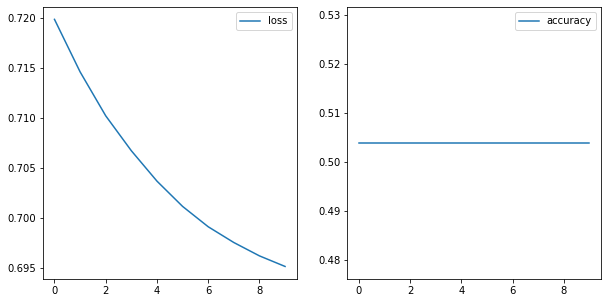

In [11]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, results.history['loss'], ax=ax1, label='loss')
sns.lineplot(results.epoch, results.history['accuracy'], ax=ax2, label='accuracy');

We have two plots above both relating to the quality fo our model.  The left-hand plot is our loss. It uses the probabilities associated with our predictions to judge how well our prediction fits reality. We want it to decrease as far as possible.

The accuracy judges how well the predictions are after applying the threshold at the output layer.  We want accuracy to increase.

If we look at our loss, it is still decreasing. That is a signal that our model is **still learning**. If our model is still learning, we can allow it to get better by turning a few dials.

Let's:
- increase the number of epochs;
- change sigmoid activation in the hidden layers to ReLU;
- decrease the batch size; and
- try an 'adam' optimizer instead of 'SGD'.

In [12]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assign the variable history to store the results,
# and set verbose=1 so we can see the output.
results = model.fit(X_pure_train, y_pure_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
36/36 [==============================] - 0s 990us/step - loss: 0.6947 - accuracy: 0.5564
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.8134
Epoch 3/100
36/36 [==============================] - 0s 991us/step - loss: 0.5573 - accuracy: 0.8586
Epoch 4/100
36/36 [==============================] - 0s 912us/step - loss: 0.4626 - accuracy: 0.8752
Epoch 5/100
36/36 [==============================] - 0s 932us/step - loss: 0.3742 - accuracy: 0.8701
Epoch 6/100
36/36 [==============================] - 0s 961us/step - loss: 0.3198 - accuracy: 0.8900
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.9038
Epoch 8/100
36/36 [==============================] - 0s 822us/step - loss: 0.2655 - accuracy: 0.8924
Epoch 9/100
36/36 [==============================] - 0s 722us/step - loss: 0.2685 - accuracy: 0.8832
Epoch 10/100
36/36 [==============================] - 0s 903us/step - loss: 0.2484 - accuracy: 

36/36 [==============================] - 0s 803us/step - loss: 0.0176 - accuracy: 0.9979
Epoch 82/100
36/36 [==============================] - 0s 694us/step - loss: 0.0153 - accuracy: 0.9985
Epoch 83/100
36/36 [==============================] - 0s 600us/step - loss: 0.0164 - accuracy: 0.9991
Epoch 84/100
36/36 [==============================] - 0s 651us/step - loss: 0.0167 - accuracy: 0.9994
Epoch 85/100
36/36 [==============================] - 0s 648us/step - loss: 0.0137 - accuracy: 0.9987
Epoch 86/100
36/36 [==============================] - 0s 712us/step - loss: 0.0127 - accuracy: 0.9992
Epoch 87/100
36/36 [==============================] - 0s 743us/step - loss: 0.0135 - accuracy: 0.9991
Epoch 88/100
36/36 [==============================] - 0s 695us/step - loss: 0.0125 - accuracy: 0.9992
Epoch 89/100
36/36 [==============================] - 0s 724us/step - loss: 0.0143 - accuracy: 0.9986
Epoch 90/100
36/36 [==============================] - 0s 720us/step - loss: 0.0122 - accuracy: 

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


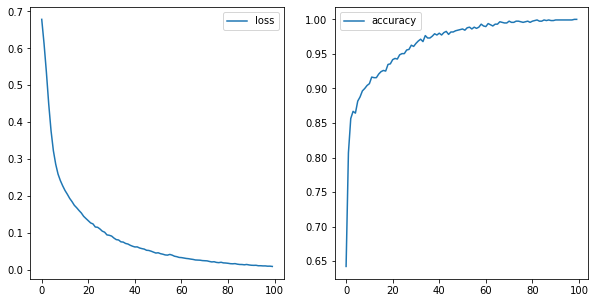

In [13]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_accuracy, ax=ax2, label='accuracy');

If we increase the learning rate to a very high number, we see that our model overshoots the minimum, and starts bouncing all around.

Epoch 1/30
115/115 [==============================] - 0s 649us/step - loss: 342.6265 - accuracy: 0.4689
Epoch 2/30
115/115 [==============================] - 0s 633us/step - loss: 0.9633 - accuracy: 0.4875
Epoch 3/30
115/115 [==============================] - 0s 682us/step - loss: 1.0653 - accuracy: 0.4862
Epoch 4/30
115/115 [==============================] - 0s 798us/step - loss: 1.0428 - accuracy: 0.4858
Epoch 5/30
115/115 [==============================] - 0s 647us/step - loss: 0.9439 - accuracy: 0.5136
Epoch 6/30
115/115 [==============================] - 0s 660us/step - loss: 1.0574 - accuracy: 0.4760
Epoch 7/30
115/115 [==============================] - 0s 574us/step - loss: 1.0234 - accuracy: 0.5245
Epoch 8/30
115/115 [==============================] - 0s 589us/step - loss: 1.0812 - accuracy: 0.4768
Epoch 9/30
115/115 [==============================] - 0s 575us/step - loss: 0.9818 - accuracy: 0.5072
Epoch 10/30
115/115 [==============================] - 0s 579us/step - loss: 1.0

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


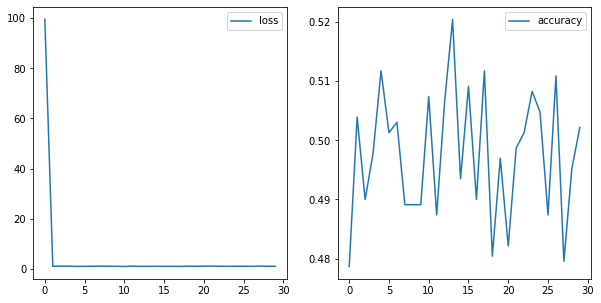

In [14]:
model = Sequential()

sgd = SGD(lr=9)
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train,
                    epochs=30, batch_size=10, verbose=1)

relu_loss = results.history['loss']
relu_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy');

We have been looking only at our training set. Let's add in our validation set to the picture.

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

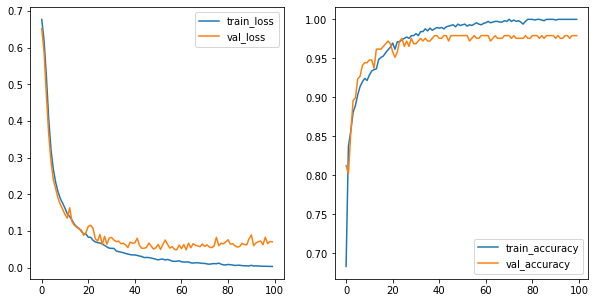

In [15]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train,
                    epochs=100, batch_size=32, verbose=0,
                    validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

In [16]:
results.history['val_accuracy'][-1]

0.9791666865348816

## Connecting with `sklearn`

The `keras.wrappers` submodule means that we can turn `keras` models into estimators that `sklearn` tools will recognize.

In [17]:
cross_val_score(model, X_pure_train, y_pure_train)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fea02bfb820> does not.

In [18]:
def build_model():
    model = Sequential()
    model.add(Dense(12, activation='relu', input_dim=64))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [19]:
keras_model = scikit_learn.KerasClassifier(build_model,
                                          epochs=50,
                                          batch_size=32,
                                          verbose=2)

In [20]:
type(keras_model)

tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier

In [21]:
cross_val_score(keras_model, X_pure_train, y_pure_train)

Epoch 1/50
29/29 - 0s - loss: 0.6694 - accuracy: 0.6148
Epoch 2/50
29/29 - 0s - loss: 0.6276 - accuracy: 0.7269
Epoch 3/50
29/29 - 0s - loss: 0.5644 - accuracy: 0.7693
Epoch 4/50
29/29 - 0s - loss: 0.4844 - accuracy: 0.8270
Epoch 5/50
29/29 - 0s - loss: 0.4120 - accuracy: 0.8553
Epoch 6/50
29/29 - 0s - loss: 0.3490 - accuracy: 0.8705
Epoch 7/50
29/29 - 0s - loss: 0.2966 - accuracy: 0.8814
Epoch 8/50
29/29 - 0s - loss: 0.2571 - accuracy: 0.9086
Epoch 9/50
29/29 - 0s - loss: 0.2287 - accuracy: 0.9162
Epoch 10/50
29/29 - 0s - loss: 0.2036 - accuracy: 0.9249
Epoch 11/50
29/29 - 0s - loss: 0.1856 - accuracy: 0.9293
Epoch 12/50
29/29 - 0s - loss: 0.1731 - accuracy: 0.9380
Epoch 13/50
29/29 - 0s - loss: 0.1609 - accuracy: 0.9412
Epoch 14/50
29/29 - 0s - loss: 0.1509 - accuracy: 0.9456
Epoch 15/50
29/29 - 0s - loss: 0.1430 - accuracy: 0.9499
Epoch 16/50
29/29 - 0s - loss: 0.1353 - accuracy: 0.9554
Epoch 17/50
29/29 - 0s - loss: 0.1264 - accuracy: 0.9532
Epoch 18/50
29/29 - 0s - loss: 0.1196 - 

Epoch 44/50
29/29 - 0s - loss: 0.1680 - accuracy: 0.9869
Epoch 45/50
29/29 - 0s - loss: 0.1629 - accuracy: 0.9913
Epoch 46/50
29/29 - 0s - loss: 0.1594 - accuracy: 0.9913
Epoch 47/50
29/29 - 0s - loss: 0.1552 - accuracy: 0.9924
Epoch 48/50
29/29 - 0s - loss: 0.1524 - accuracy: 0.9924
Epoch 49/50
29/29 - 0s - loss: 0.1482 - accuracy: 0.9913
Epoch 50/50
29/29 - 0s - loss: 0.1458 - accuracy: 0.9924
8/8 - 0s - loss: 0.1750 - accuracy: 0.9652
Epoch 1/50
29/29 - 0s - loss: 0.6893 - accuracy: 0.5038
Epoch 2/50
29/29 - 0s - loss: 0.6664 - accuracy: 0.5158
Epoch 3/50
29/29 - 0s - loss: 0.6283 - accuracy: 0.5767
Epoch 4/50
29/29 - 0s - loss: 0.5752 - accuracy: 0.6975
Epoch 5/50
29/29 - 0s - loss: 0.5261 - accuracy: 0.8074
Epoch 6/50
29/29 - 0s - loss: 0.4931 - accuracy: 0.8248
Epoch 7/50
29/29 - 0s - loss: 0.4699 - accuracy: 0.8640
Epoch 8/50
29/29 - 0s - loss: 0.4504 - accuracy: 0.8705
Epoch 9/50
29/29 - 0s - loss: 0.4333 - accuracy: 0.8836
Epoch 10/50
29/29 - 0s - loss: 0.4185 - accuracy: 0.89

array([0.96086955, 0.94782609, 0.96521741, 0.96956521, 0.90829694])

## Regularization

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

We'll add a few more layers to give regularization a better chance of making a difference!

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

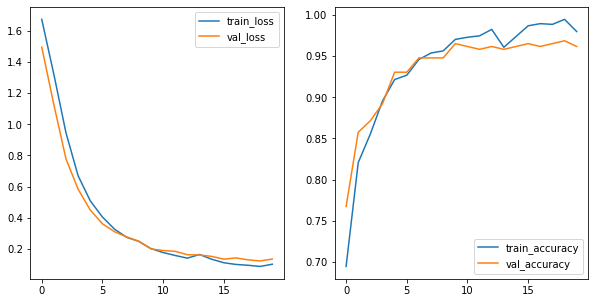

In [22]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64))
model.add(Dense(20, activation='relu',
                kernel_regularizer=l2(l2=0.05)))

# Note that there is also a bias_regularizer,
# but this tends to have less effect.

model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train, epochs=20, batch_size=32,
                    verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

Adding L2 to multiple layers:

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

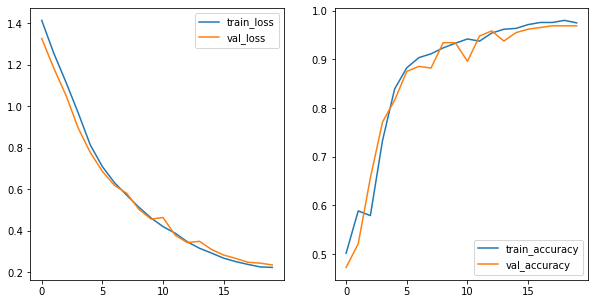

In [23]:
model = Sequential()
model.add(Dense(30, activation='relu',
                input_dim=64))
model.add(Dense(20, activation='relu',
                kernel_regularizer=l2(l2=0.01)))

model.add(Dense(12, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(12, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(8, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(4, activation='relu',
                kernel_regularizer=l2(l2=0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train, epochs=20, batch_size=32,
                    verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

Adding more epochs:

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

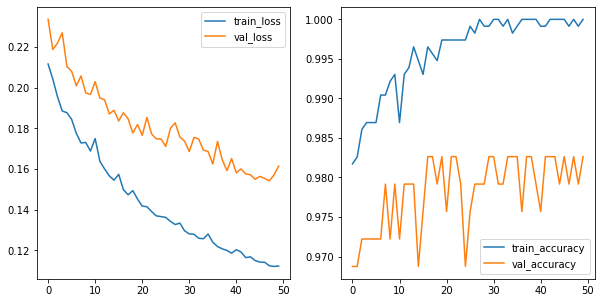

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train, epochs=50, batch_size=32,
                    verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

### Dropout

We can also specify a dropout layer in keras, which randomly shuts off different nodes during training.

![drop_out](../img/drop_out.png)

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64))
model.add(Dense(20, activation='relu'))

# This will apply to the previous layer
model.add(Dropout(0.5))

model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train, epochs=50,
                    batch_size= 32, verbose=0,
                    validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

### Early Stopping

We can also tell our neural network to stop once it stops realizing any gain.

This is the model with no regularization:

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64))
model.add(Dense(20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train, epochs=20,
                    batch_size=32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

Here we tell it to stop once the a very small positive change in the validation loss occurs:

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping object
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           patience=0, verbose=1,
                           mode='min')

# Place this in a list as the value of the `callbacks` parameter
# in the `.fit()` method.
results = model.fit(X_pure_train, y_pure_train,
                    epochs=20, batch_size=32,
                    verbose=0, validation_data=(X_val, y_val),
                    callbacks=[early_stop])

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

That probably stopped too early. We can specify the number of epochs in which it doesn't see decrease in the loss with the `patience` parameter.

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping object
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           patience=5, verbose=1,
                           mode='min')

# Place this in a list as the value of the `callbacks` parameter
# in the `.fit()` method.
results = model.fit(X_pure_train, y_pure_train,
                    epochs=50, batch_size= 32,
                    verbose=0, validation_data=(X_val, y_val),
                    callbacks=[early_stop])

train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy');

## Multiclass Classification and Softmax

Now let's return to the problem of predicting digits 0 through 9.

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.2)
X_pure_train, X_val, y_pure_train, y_val =\
    train_test_split(X_train, y_train,
                     random_state=42, test_size=0.2)
X_pure_train, X_val, X_test = X_pure_train/16, X_val/16, X_test/16

For a multiclass output, our neural net expects our target to be in a certain form.

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_pure_train = ohe.fit_transform(y_pure_train.reshape(-1,1))
y_val = ohe.transform(y_val.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [ ]:
y_test

In [ ]:
# Model from above:

model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_pure_train, y_pure_train,
                   epochs=50, batch_size=10,
                   validation_data=(X_val, y_val))

$$\large \text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

The sofmax function outputs a number between 0 and 1 for each of our classes.  All of the probabilities of the classes sum up to 1.

The number of nodes in our output layer equals the number of categories in our dataset.

We also need a new loss function: **categorical crossentropy**, which calculates a separate loss for each label and then sums the results.

In [ ]:
history = results.history
training_loss = history['loss']
val_loss = history['val_loss']
training_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))


sns.lineplot(list(range(len(training_loss))),
             training_loss, color='r', label='training', ax=ax1)
sns.lineplot(list(range(len(val_loss))),
             val_loss, color='b', label='validation', ax=ax1)
sns.lineplot(list(range(len(training_loss))),
             training_accuracy, color='r', label='training',ax=ax2)
sns.lineplot(list(range(len(val_loss))),
             val_accuracy, color='b', label='validation',ax=ax2)
ax1.legend();

In [ ]:
y_hat_test = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
y_test_restore = ohe.inverse_transform(y_test)
confusion_matrix(y_test_restore, y_hat_test)

Wow, look at that performance!  

That is great, but remember, we were dealing with simple black and white images.  With color, our basic neural net will have less success.

We will explore more advanced tools in the coming days.


## Appendix: More on Tensorflow Vs. Keras


### Let's start with tensors

Tensors are multidimensional matrices.

![tensor](../img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](../img/cat-tensors.gif)

For our numbers dataset, our tensors from the `sklearn` dataset were originally tensors of the shape 8x8, i.e. 64-bit pictures. Remember, that was with black and white images.

For image processing, we are often dealing with color.

In [ ]:
image = load_sample_images()['images'][0]

imgplot = plt.imshow(image)

In [ ]:
image.shape

What do the dimensions of our image above represent?

Tensors with higher numbers of dimensions have a higher **rank**.

A matrix with rows and columns only, like the black and white numbers, has **rank 2**.

A matrix with a third dimension, like the color pictures above, has **rank 3**.

When we flatten an image by stacking the rows in a column, we are decreasing the rank. 

In [ ]:
flat_image = image.reshape(-1, 1)

flat_image.shape

In [ ]:
427*640*3

## TensorFlow has more levers and buttons, but Keras is more user friendly

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](../img/levers.jpeg)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit more complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage `tensorflow` commands within `keras` and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs'. Keras is designed with the developer in mind. 

[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)